In [1]:
#Install pakages
#using Pkg 
#Pkg.add("PyCall")
#Pkg.add("Statistics")
#Pkg.add("Images")
#Pkg.add("QuartzImageIO")
#Pkg.add("ImageMagick")

In [2]:
using PyCall
using Statistics
using Images
using ImageFiltering

┌ Info: Recompiling stale cache file /Users/eyu/.julia/compiled/v1.1/PyCall/GkzkC.ji for PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/eyu/.julia/compiled/v1.1/Images/H8Vxc.ji for Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1184


## !!! Restart Kernal after changing environment !!!

In [3]:
# Set environment
#ENV["PYTHON"] = "/anaconda3/bin/python3"
#using Pkg
#Pkg.build("PyCall")

Check wich python is used

In [4]:
PyCall.pyprogramname

"/anaconda3/bin/python3"

#### Load raterio with PyCall
The `pyimport` function is used to import python libaries


In [5]:
rasterio = pyimport("rasterio")

proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode


PyObject <module 'rasterio' from '/anaconda3/lib/python3.6/site-packages/rasterio/__init__.py'>

The dataset can now be loaded with `rasterio.open()`, and a list of the keys

In [6]:
f = open("data_path.txt")
path = readlines(f)
#path = "/Users/eyu/YOEO_local/data/S1B_IW_SLC__1SDV_20170315T053950_20170315T054018_004715_0083B0_7EE9.SAFE/measurement/s1b-iw1-slc-vv-20170315t053951-20170315t054016-004715-0083b0-004.tiff"
dataset = rasterio.open(path[1])

proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode


PyObject <open DatasetReader name='/Users/eyu/YOEO_local/data/S1B_IW_SLC__1SDV_20170315T053950_20170315T054018_004715_0083B0_7EE9.SAFE/measurement/s1b-iw3-slc-vv-20170315t053950-20170315t054018-004715-0083b0-006.tiff' mode='r'>

Get the methods and atribute names with `keys()`

In [7]:
println(keys(dataset))

Symbol[:__class__, :__delattr__, :__dict__, :__dir__, :__doc__, :__enter__, :__eq__, :__exit__, :__format__, :__ge__, :__getattribute__, :__gt__, :__hash__, :__init__, :__init_subclass__, :__le__, :__lt__, :__module__, :__ne__, :__new__, :__pyx_vtable__, :__reduce__, :__reduce_ex__, :__repr__, :__setattr__, :__setstate__, :__sizeof__, :__str__, :__subclasshook__, :__weakref__, :_block_shapes, :_closed, :_count, :_crs, :_crs_wkt, :_descriptions, :_dtypes, :_env, :_gcps, :_get_crs, :_handle_crswkt, :_has_band, :_mask_flags, :_nodatavals, :_offsets, :_read, :_scales, :_set_all_descriptions, :_set_all_offsets, :_set_all_scales, :_set_all_units, :_set_attrs_from_dataset_handle, :_set_crs, :_set_gcps, :_set_nodatavals, :_transform, :_units, :block_shapes, :block_size, :block_window, :block_windows, :bounds, :checksum, :close, :closed, :colorinterp, :colormap, :compression, :count, :crs, :dataset_mask, :descriptions, :driver, :dtypes, :files, :gcps, :get_gcps, :get_nodatavals, :get_tag_item, 

proj_create_from_database: ellipsoid not found
proj_create_from_database: ellipsoid not found


Show meta data

In [8]:
dataset.meta

Dict{Any,Any} with 8 entries:
  "driver"    => "GTiff"
  "dtype"     => "complex"
  "height"    => 15240
  "nodata"    => nothing
  "count"     => 1
  "width"     => 25330
  "transform" => (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
  "crs"       => nothing

### Load image
Here the indeces chosen focuses on the area near the corner reflectors. 

In [252]:
# CR's at ((1110,1150), (6080,6120))
# Bridge with coordinates: (56.003092, 8.129702), and indices: ((6409, 6418), (6250,6265))
VVraw = dataset.read(1, window = ((0, 7000), (0,10000))) 
typeof(VVraw)

Array{Complex{Float64},2}

In [253]:
abs.(VVraw[1:5, 1:5])

5×5 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

### convert to real and normalise for show

In [254]:
Show_img = abs.(copy(VVraw))
Show_img = Show_img./quantile(reshape(Show_img, :), 0.98);

### Show image

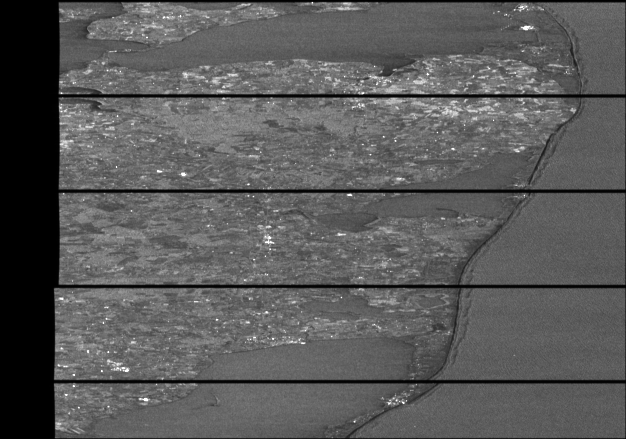

In [255]:
Gray.(Show_img)

### Filter out noise
Using julia ImageFiltering package and standard built in gaussian filter

In [102]:
imgg = imfilter(Show_img, Kernel.gaussian(1));

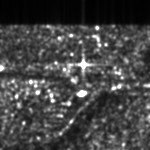

In [103]:
Gray.(imgg)

The corner reflectors are clearly seen, but geometry looks different from that of the SDFE report due to geometrical distortion. We can focus on each reflector, counting from left to right on the image above:

### Indices of reflectors

#### reflector 1

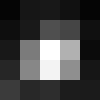

In [253]:
raw_1 = dataset.read(1,window = ((1123,1128), (6084,6089)))
reflector_1 = abs.(copy(raw_1))
reflector_1 = reflector_1./quantile(reshape(reflector_1, :), 0.98);
Gray.(reflector_1)

Centered at approx. (row, column): (1125,6086)

#### reflector 2

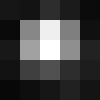

In [254]:
raw_2 = dataset.read(1,window = ((1120,1125), (6097,6102)))
reflector_2 = abs.(copy(raw_2))
reflector_2 = reflector_2./quantile(reshape(reflector_2, :), 0.98);
Gray.(reflector_2)

Centered at approx. (row, column): (1122,6099)

#### reflector 3

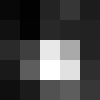

In [255]:
raw_3 = dataset.read(1,window = ((1123,1128), (6108,6113)))
reflector_3 = abs.(copy(raw_3))
reflector_3 = reflector_3./quantile(reshape(reflector_3, :), 0.98);
Gray.(reflector_3)

Centered at approx. (row, column): (1126, 6110)